# Setup

In [1]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from scipy.sparse import csc_matrix
import scipy
import scipy.signal
from scipy import sparse
from scipy.stats import norm
import re

In [2]:
# Choose parameters:
K = 10    # (10, 15)
rf = 30   # (20, 25, 30)
cnmf = 10 # (8, 10, 12)

In [3]:
input_folder = r'\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\JUV011\211215\caiman_parameter_comparison'
input_file = fr'JUV011-211215-gonogo-001_{K}-{rf}-{cnmf}.hdf5'

In [4]:
hfile = os.path.join(input_folder, input_file)
hf = h5py.File(hfile, 'r')
hf.keys()

<KeysViewHDF5 ['dff', 'dims', 'dview', 'estimates', 'mmap_file', 'params', 'remove_very_bad_comps', 'skip_refinement', 'snr']>

# Sanity Check

In [5]:
# A is stored as a scipy.sparse.csc_matrix
def load_A(hf):
    if 'estimates' in hf:
        A = hf['estimates']['A']
    else:
        A = hf['Nsparse']
    data = A['data']
    indices = A['indices']
    indptr = A['indptr']
    return csc_matrix((data, indices, indptr), A['shape'])

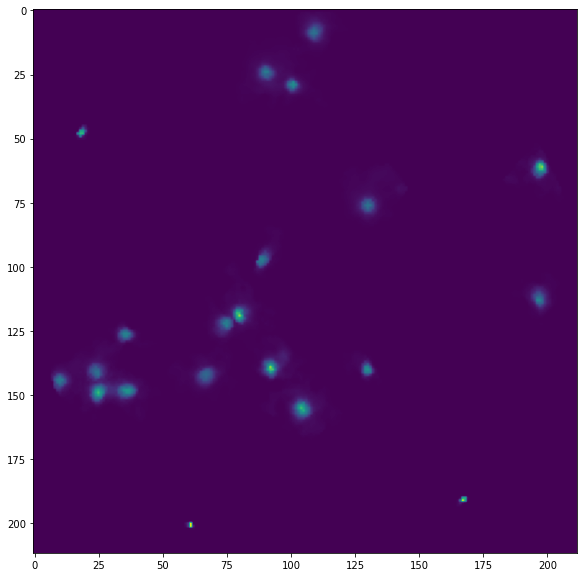

In [6]:
A = load_A(hf)
dims = np.array(hf['dims'])
roi_aggregate = np.sum(A, axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(roi_aggregate.reshape(dims, order='F'))

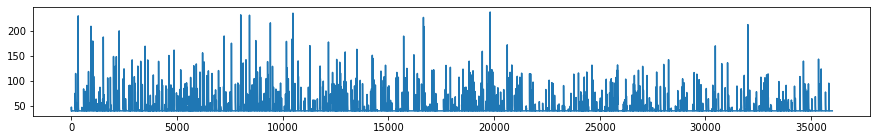

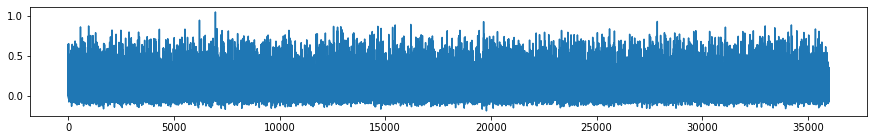

In [7]:
C = np.array(hf['estimates/C'])
dff = np.array(hf['dff'])
plt.figure(figsize=(15, 2))
plt.plot(C[1])
plt.figure(figsize=(15, 2))
plt.plot(dff[1])

In [8]:
# Number of ROIs:
roi_n = A.shape[1]
roi_n

26

# Spatial/Temporal Output for each ROI

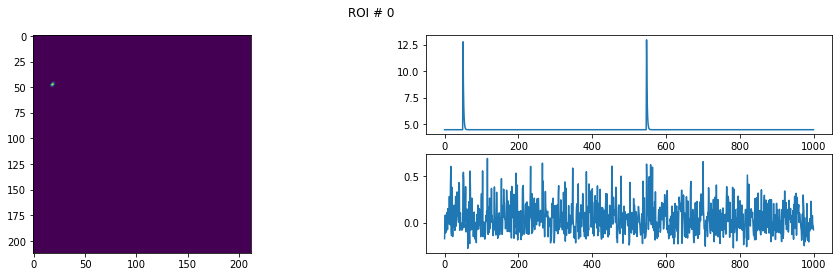

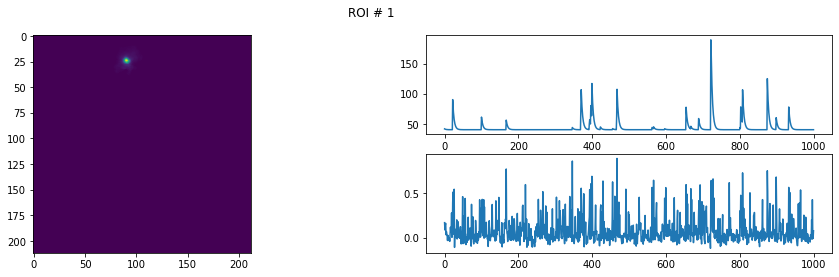

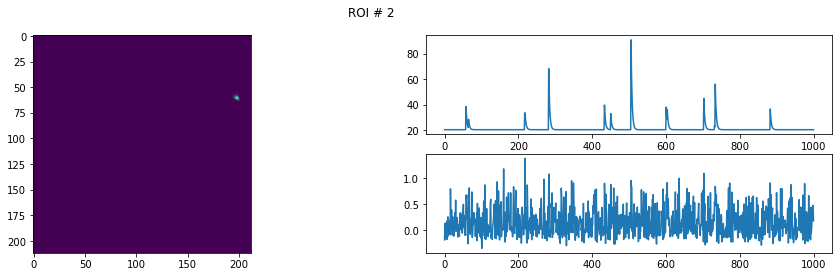

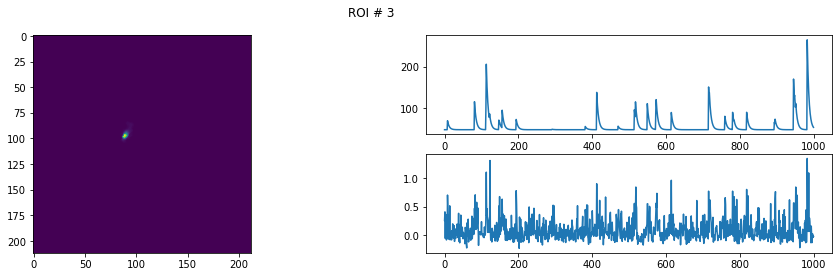

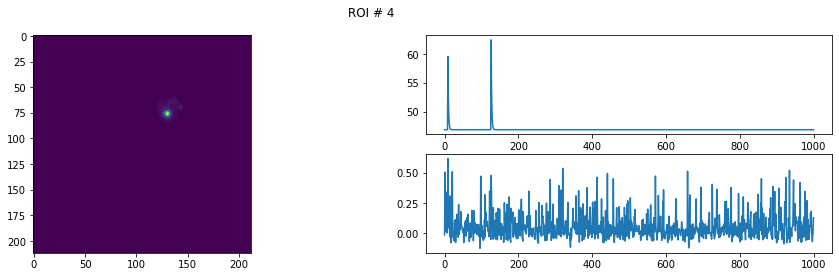

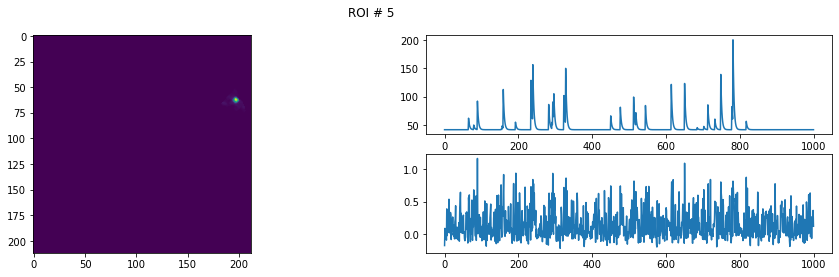

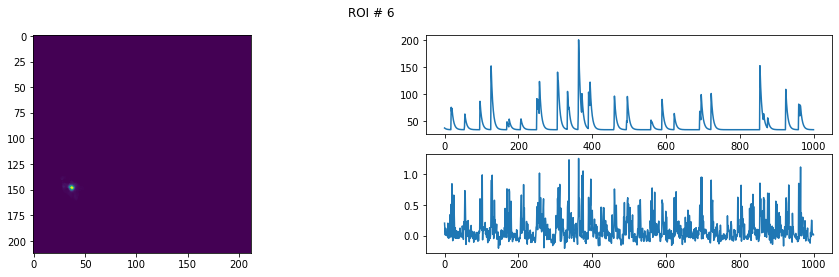

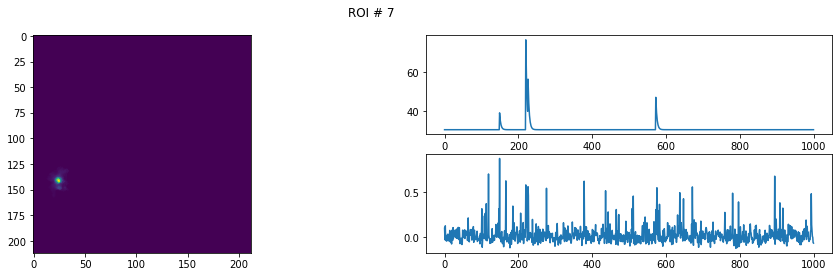

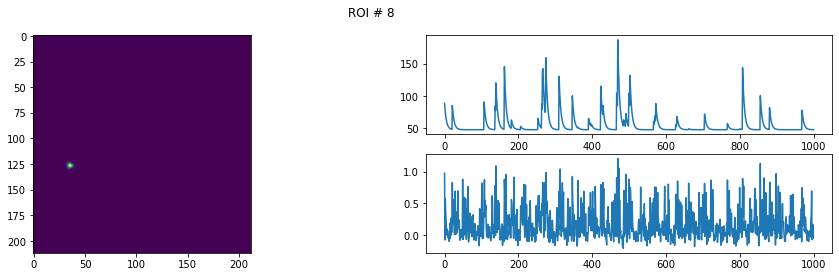

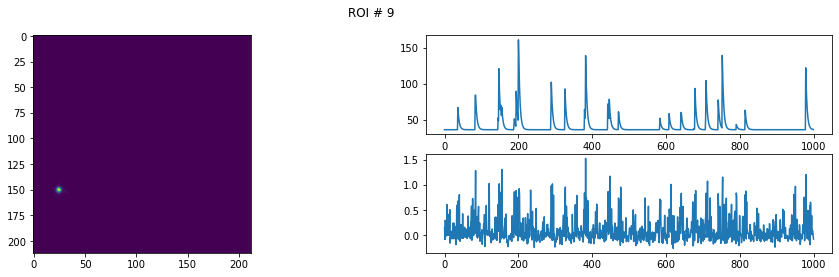

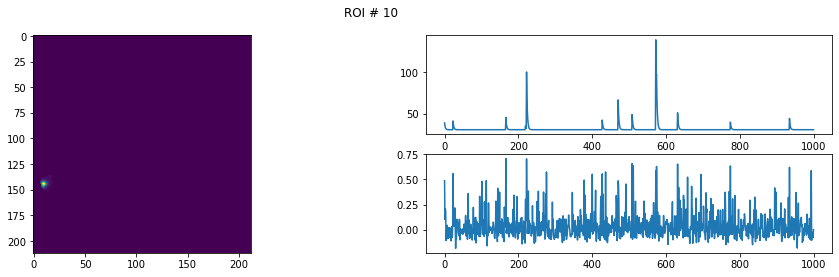

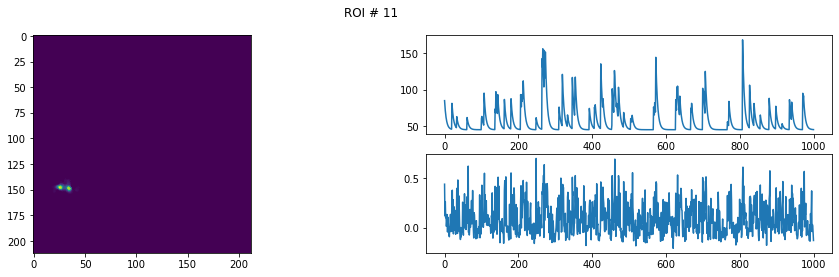

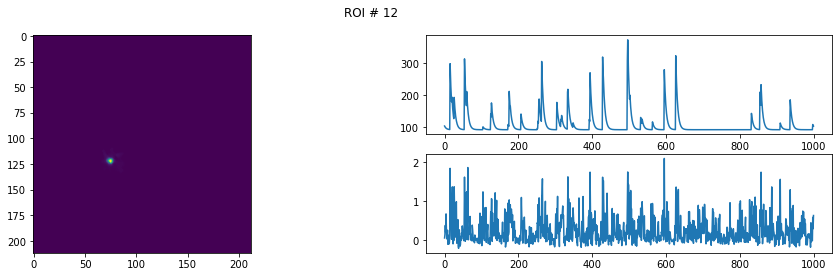

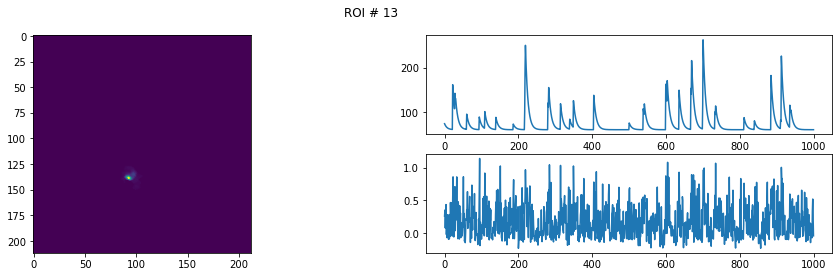

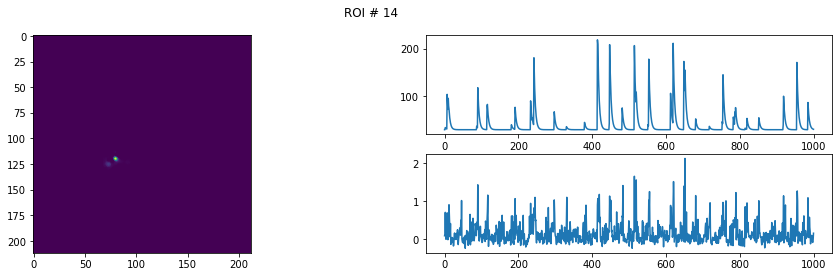

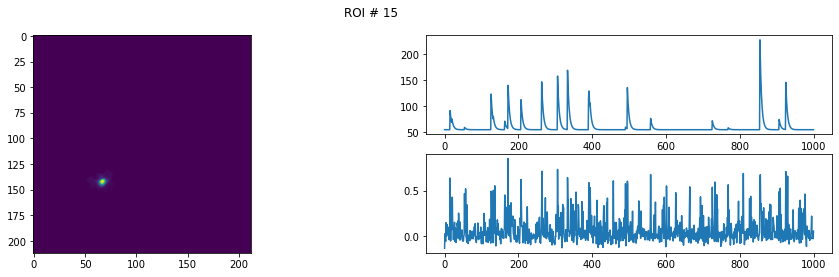

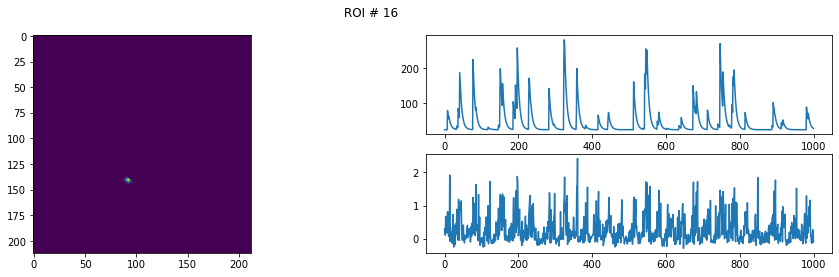

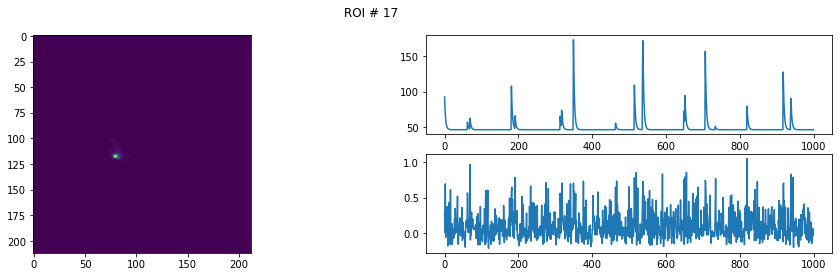

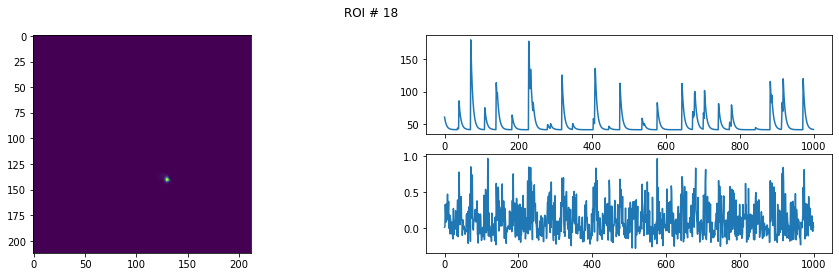

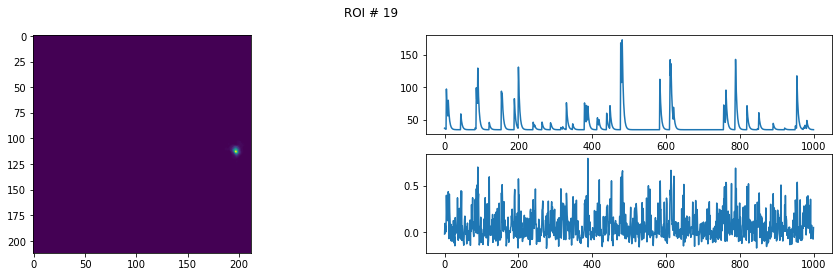

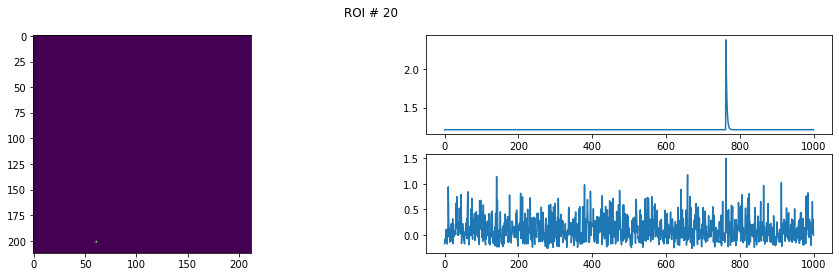

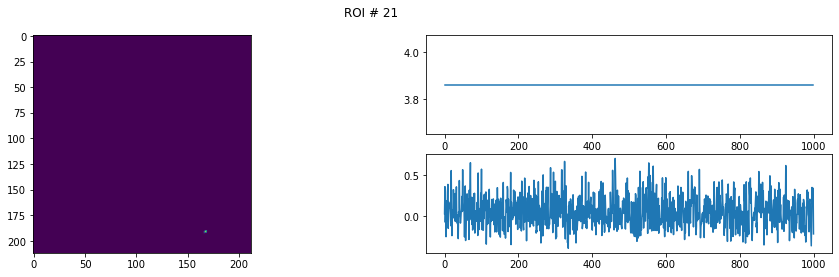

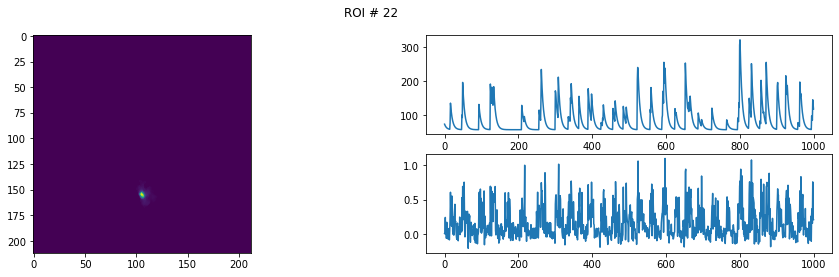

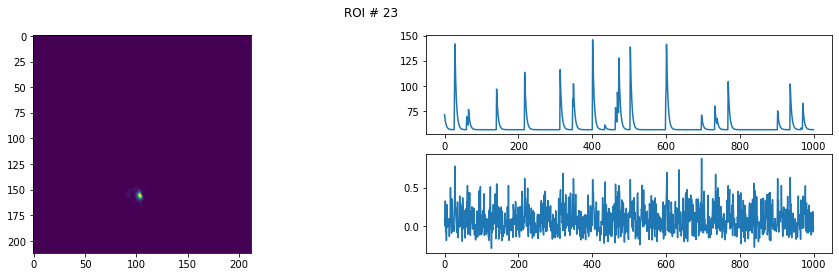

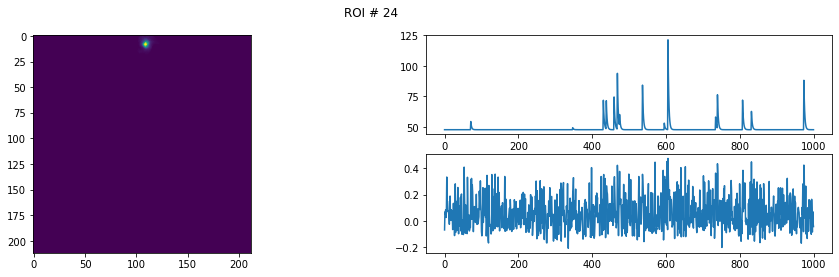

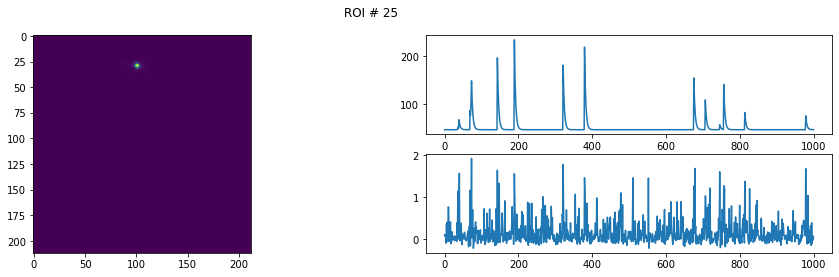

In [10]:
for roi in range(roi_n):
    plt.figure(figsize=(16,4))
    plt.subplot2grid((2, 2), (0, 0), rowspan=2)
    plt.imshow(A.toarray()[:, roi].reshape(dims, order='F'))
    plt.subplot2grid((2, 2), (0, 1))
    plt.plot(C[roi][15000:16000])
    plt.subplot2grid((2, 2), (1, 1))
    plt.plot(dff[roi][15000:16000])
    plt.suptitle("ROI # " + str(roi))